# EDA - House Price Prediction 
### Authors: 
* Huỳnh Anh Nhựt
* Nguyễn Tiến Minh

### import thư viện

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### import dữ liệu

In [3]:
df = pd.read_csv('./data/train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Như ta thấy dữ liệu có đến 80 features và 1490 dòng dữ liệu, trong đó rất nhiều feature chứa missing value

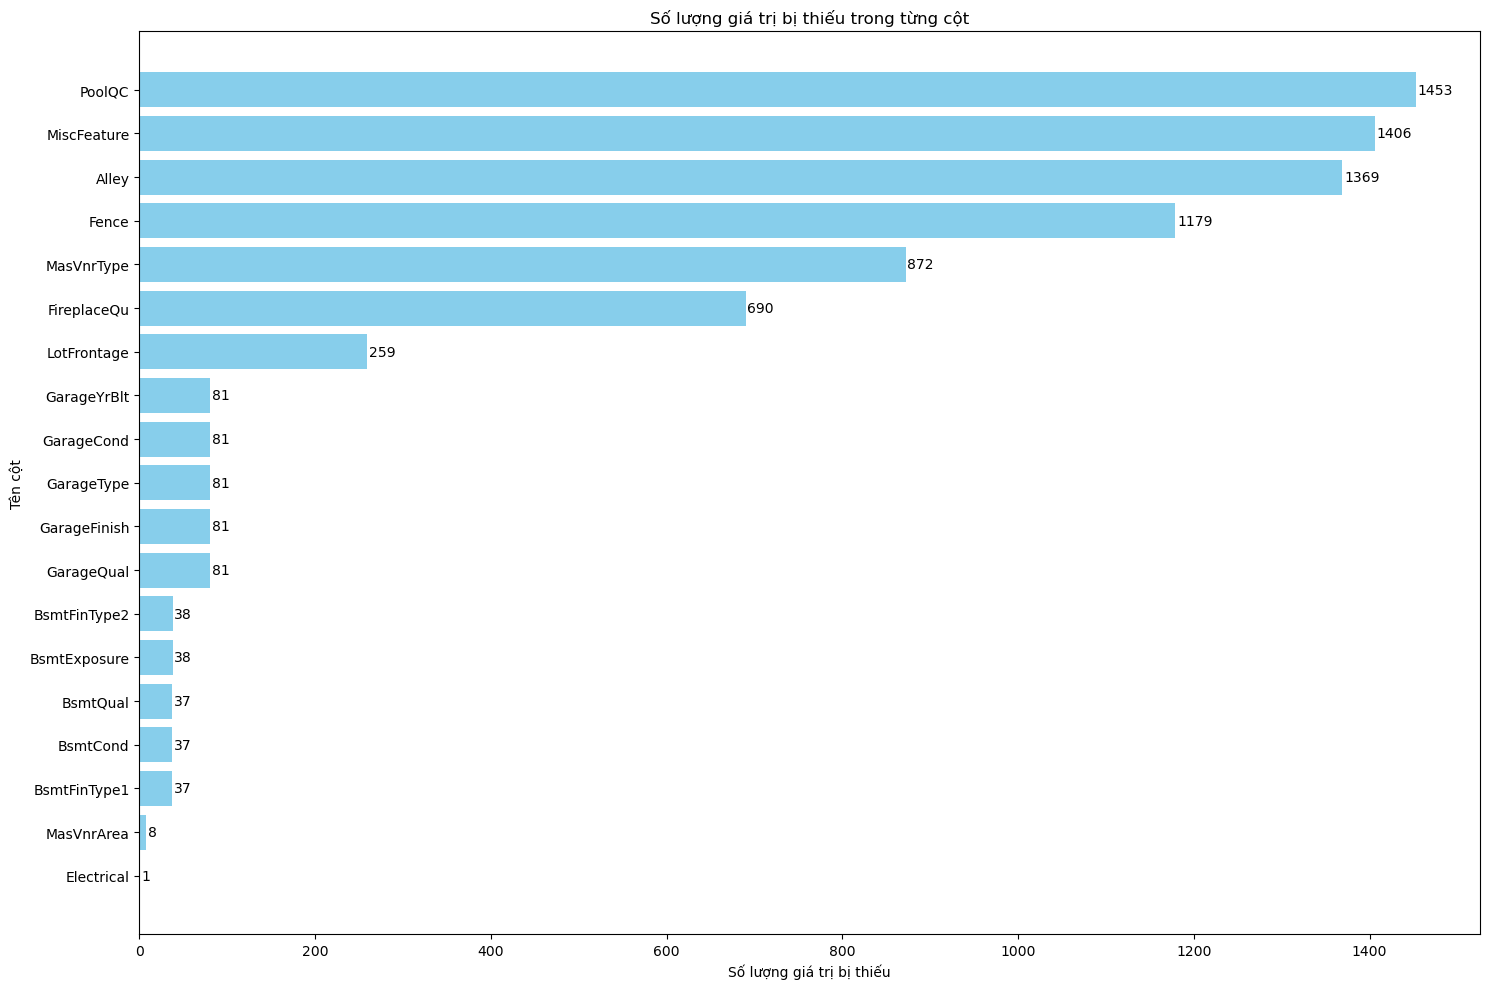

In [4]:
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]

plt.figure(figsize=(15, 10))
bars = plt.barh(missing.index, missing.values, color='skyblue')
plt.title('Số lượng giá trị bị thiếu trong từng cột')
plt.xlabel('Số lượng giá trị bị thiếu')
plt.ylabel('Tên cột')

for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 2, bar.get_y() + bar.get_height()/2, int(xval),
             va='center', fontsize=10)

plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

### Dữ liệu này có đến 19 feature chứa missing value, trong đó ít nhất là feature Electrical chỉ chứa 1 missing value và nhiều nhất là PoolQC chưa đến 1453 dòng missing value

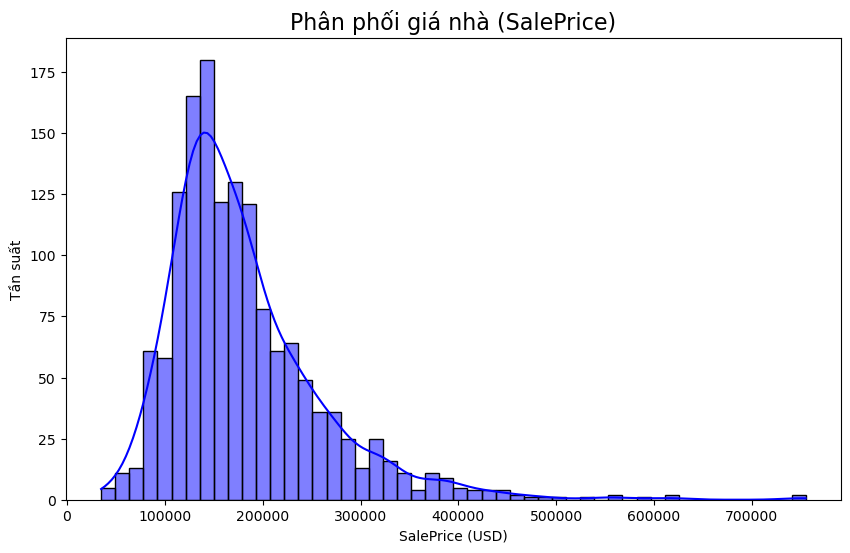

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], kde=True, color='blue', bins=50)
plt.title('Phân phối giá nhà (SalePrice)', fontsize=16)
plt.xlabel('SalePrice (USD)')
plt.ylabel('Tần suất')
plt.show()


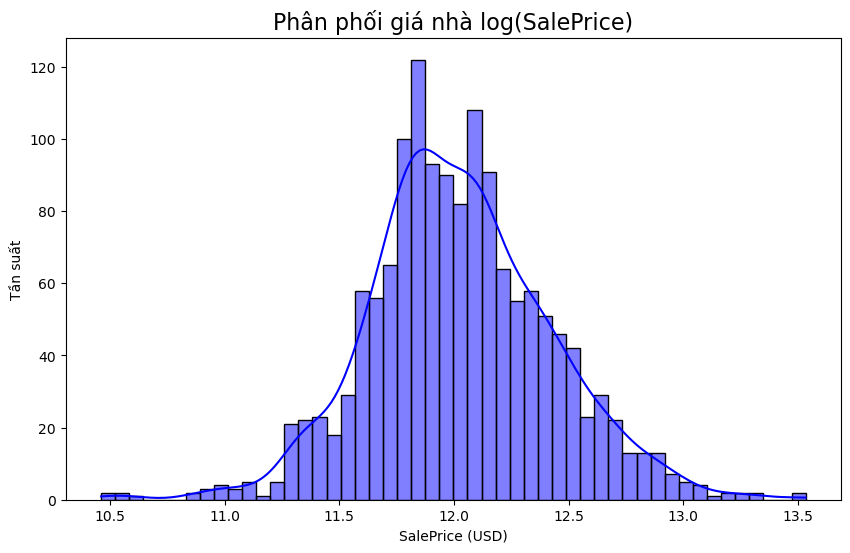

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(np.log1p(df['SalePrice']), kde=True, color='blue', bins=50)
plt.title('Phân phối giá nhà log(SalePrice)', fontsize=16)
plt.xlabel('SalePrice (USD)')
plt.ylabel('Tần suất')
plt.show()


### Giá nhà trong dữ liệu tập trung ở múc giá từ 100000$ đến 200000$, có số ít nhà có giá cao > 400000$

### Ta thấy dataset này có quá nhiều feature nên việc eda cũng không thể diễn ra như bình thường, ta sẽ chia ra 2 nhóm feature numeric và categorical để có thể phân tích chi tiết hơn bộ dataset này

In [4]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns
cat_features = df.select_dtypes(include=['object']).columns

num_features = num_features.drop(labels='Id')

print(f"Numeric features: {num_features}")
print(f"Categorical features: {cat_features}")

Numeric features: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Categorical features: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', '

In [8]:
print("Số lượng biến số định lượng:", len(num_features))
print("Mô tả thống kê cho các biến số:")
df[num_features].describe().T


Số lượng biến số định lượng: 37
Mô tả thống kê cho các biến số:


,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


## Phân tích đặc trưng số

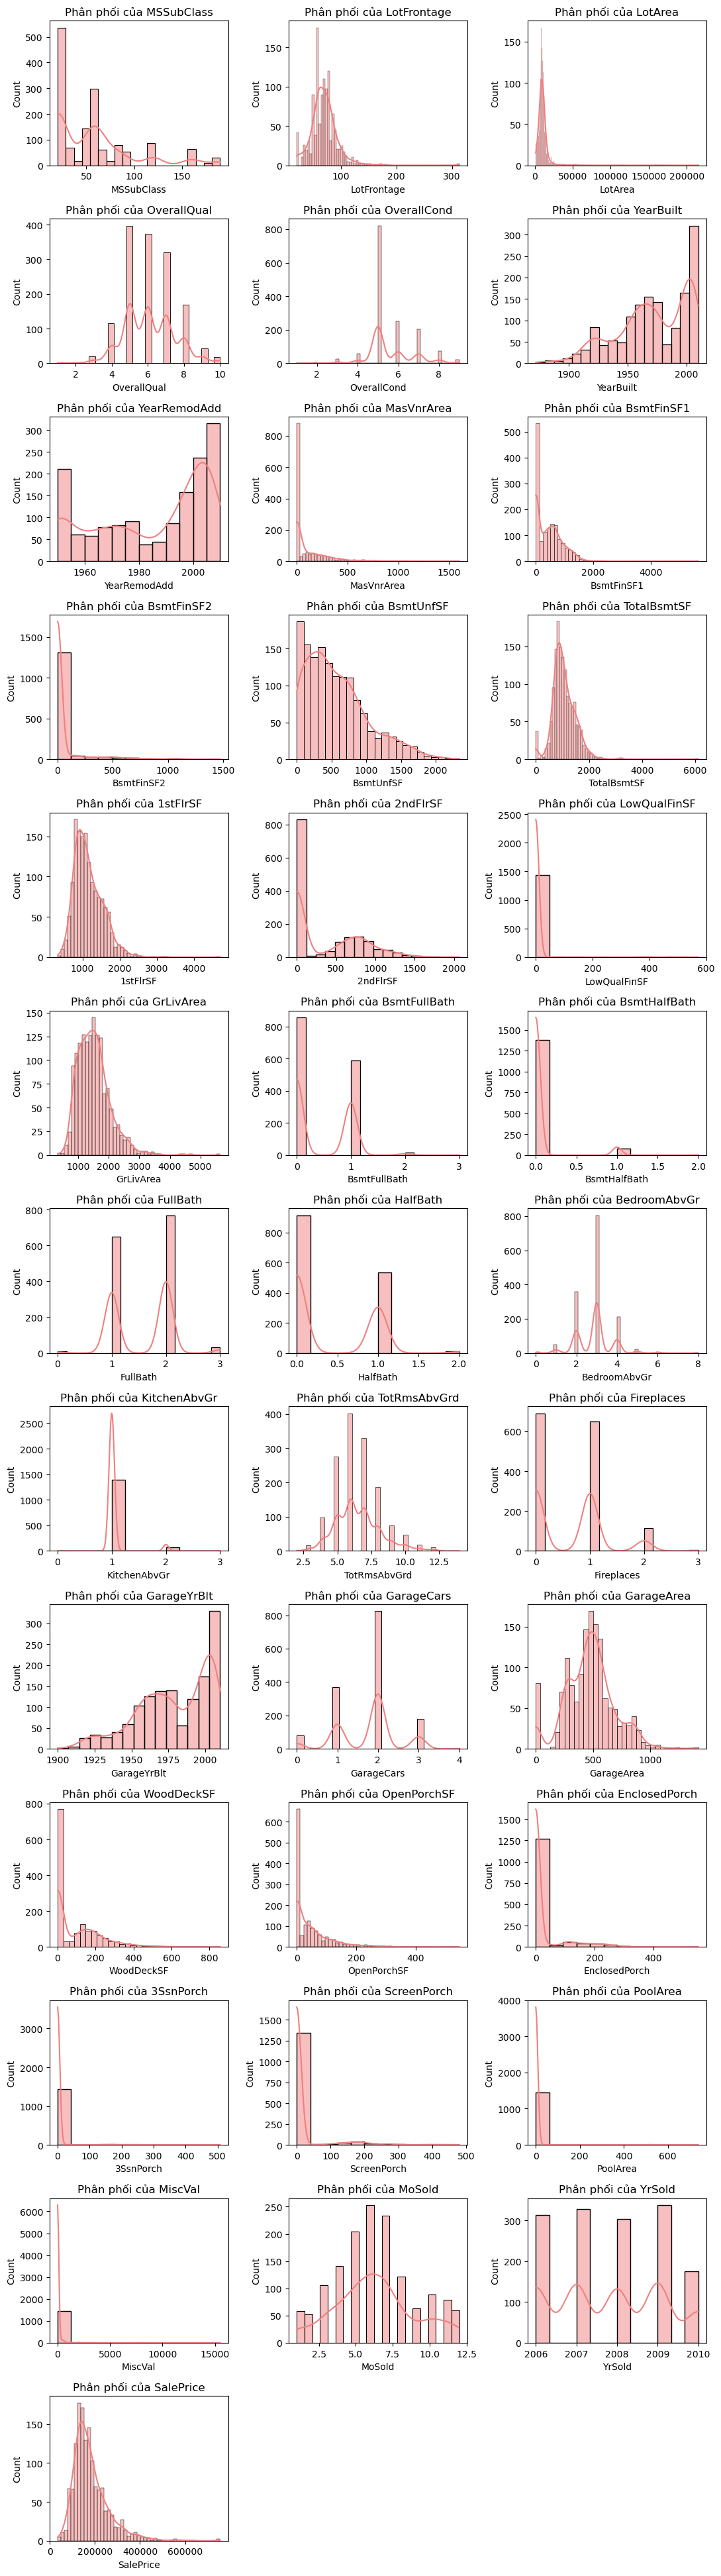

In [5]:
n_cols = 3
n_rows = int(np.ceil(len(num_features)/ n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(11, n_rows * 3))
axes = axes.flatten() 

for i, col in enumerate(num_features):
    sns.histplot(df[col], kde=True, color='lightcoral', ax=axes[i])
    axes[i].set_title(f'Phân phối của {col}', fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Nhận xét:
* Phần lớn các feature có phân phối lệch phải 
* Nhiều feature có phân phối phân cụm, rời rạc như: YrSold, MoSold,... Đây là feature phân loại nhưng được mã hóa bằng số
* Nhóm đại diện về diện tích, kích thước (LotArea, GrLivArea, TotalBsmtSF, 1stFlrSF, GarageArea,...):
- Các feature có phân phối lệch phải, cho thấy phần lớn căn nhà có kích thước nhỏ, ít nhà to
* Nhóm thời gian (YearBuilt, YearRemodAdd, GarageYrBlt, YrSold):
- YearBuild và YearRemodAdd có phân phối không đều, cho thấy nhà trong dữ liệu đa số là nhà cũ, được xây từ 2000 trở về trước
* Nhóm chất lượng (OverallQual, OverallCond):
- Phân phối khá hơi lệch một chút, tập trung nhiều ở giữa, cho thấy có nhiều nhà chất lượng trung bình, ít nhà quá tệ hoặc quá tốt
* Nhóm tiện ích (FullBath, HalfBath, Bedroom, Kitchen, TotRmsAbvGrd):
- Phân phối rời rạc, phân cụm cho thấy đây là các biên phân loại
- Có ảnh hưởng đôi chút đến giá nhà



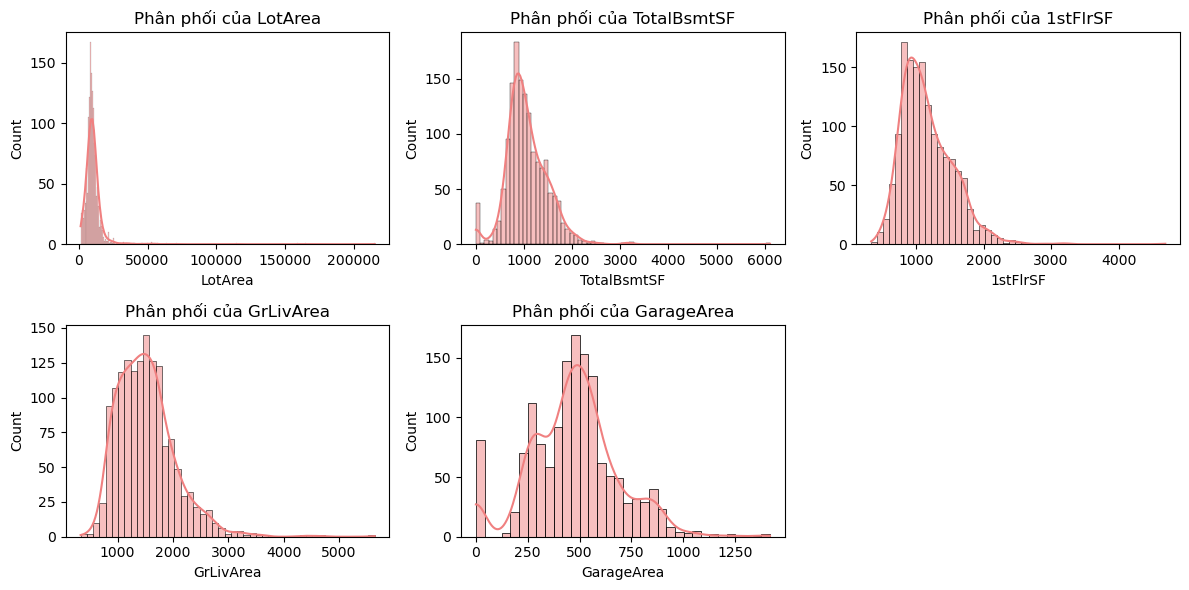

In [16]:
size_features = ['LotArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea']

fig, axes = plt.subplots(2, 3, figsize=(12, 2 * 3))
axes = axes.flatten() 

for i, col in enumerate(size_features):
    sns.histplot(df[col], kde=True, color='lightcoral', ax=axes[i])
    axes[i].set_title(f'Phân phối của {col}', fontsize=12)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

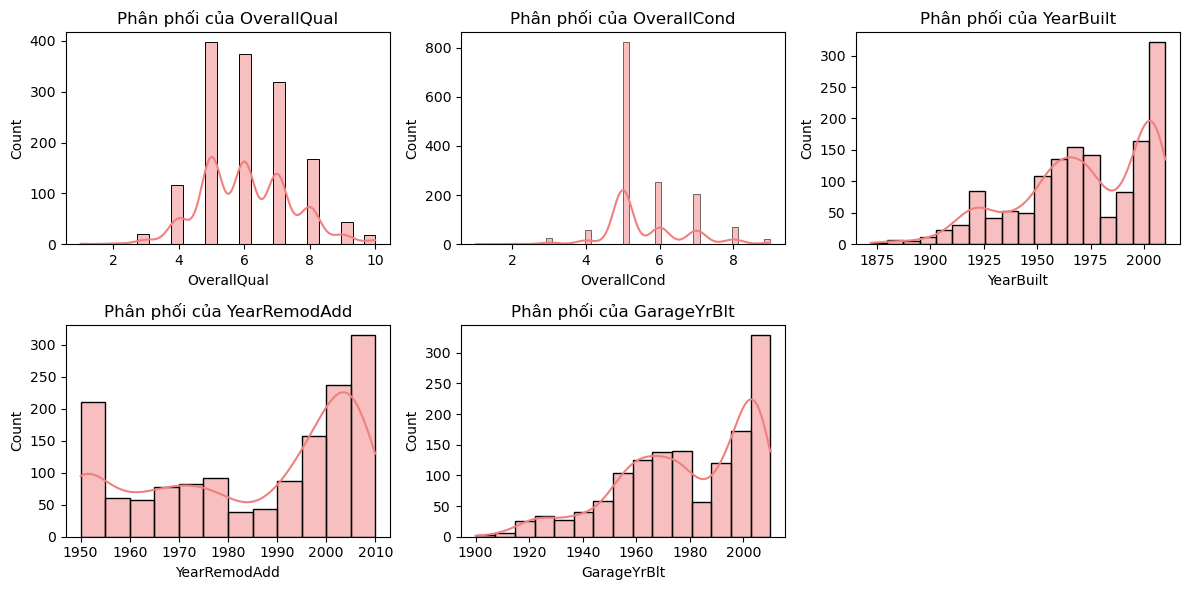

In [17]:
quality_features = ['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
fig, axes = plt.subplots(2, 3, figsize=(12, 2 * 3))
axes = axes.flatten()
for i, col in enumerate(quality_features):
    sns.histplot(df[col], kde=True, color='lightcoral', ax=axes[i])
    axes[i].set_title(f'Phân phối của {col}', fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

C:\Users\MSI VN\AppData\Local\Temp\ipykernel_3848\1839484613.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='SalePrice', palette='Set3', ax=axes[i])
C:\Users\MSI VN\AppData\Local\Temp\ipykernel_3848\1839484613.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='SalePrice', palette='Set3', ax=axes[i])
C:\Users\MSI VN\AppData\Local\Temp\ipykernel_3848\1839484613.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='SalePrice', palette='Set3', ax=axes[i])
C:\Users\MSI VN\AppData\Local\T

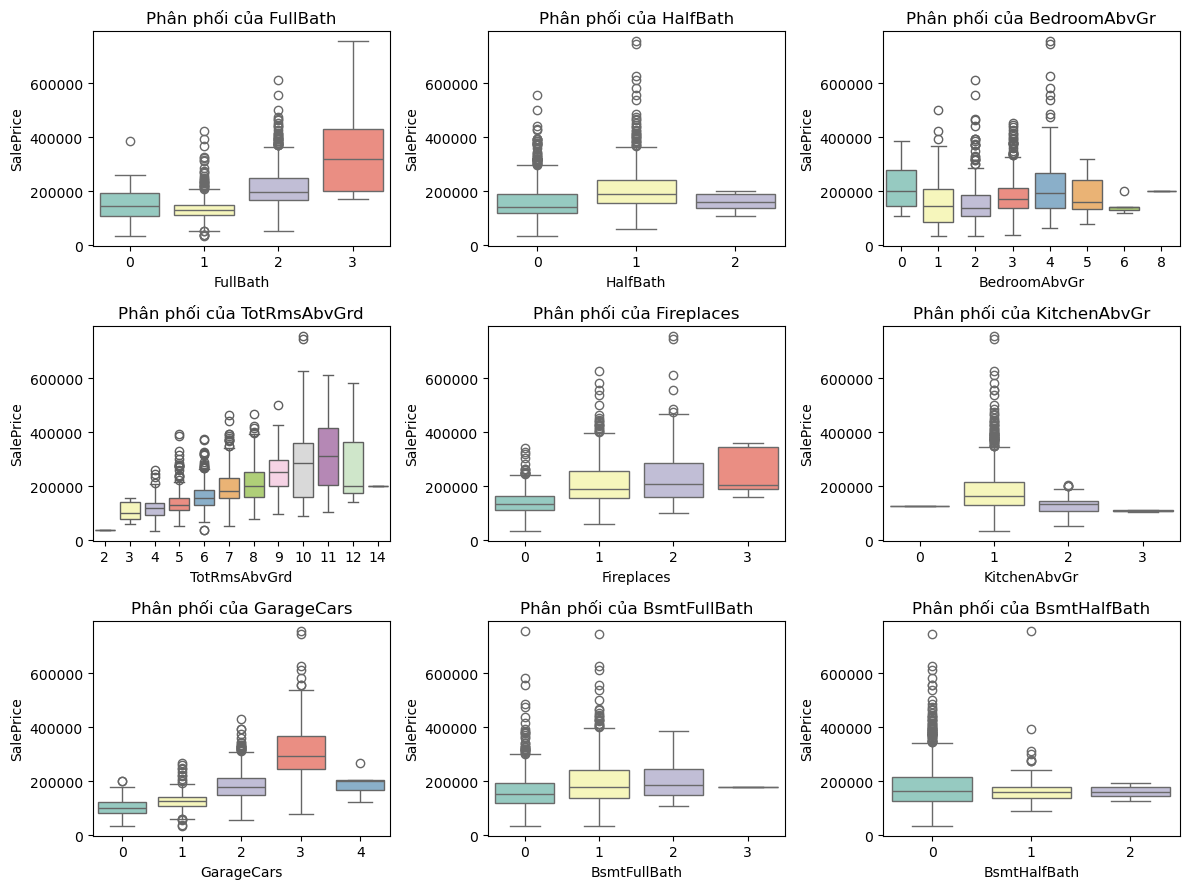

In [26]:
interior_features = ['FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'KitchenAbvGr', 'GarageCars', 'BsmtFullBath', 'BsmtHalfBath']

fig, axes = plt.subplots(3, 3, figsize=(12, 3 * 3))
axes = axes.flatten()

for i, col in enumerate(interior_features):
    sns.boxplot(data=df, x=col, y='SalePrice', palette='Set3', ax=axes[i])
    axes[i].set_title(f'Phân phối của {col}', fontsize=12)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

C:\Users\MSI VN\AppData\Local\Temp\ipykernel_3848\3116736416.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='SalePrice', palette='Set3', ax=axes[i])
C:\Users\MSI VN\AppData\Local\Temp\ipykernel_3848\3116736416.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='SalePrice', palette='Set3', ax=axes[i])
C:\Users\MSI VN\AppData\Local\Temp\ipykernel_3848\3116736416.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='SalePrice', palette='Set3', ax=axes[i])


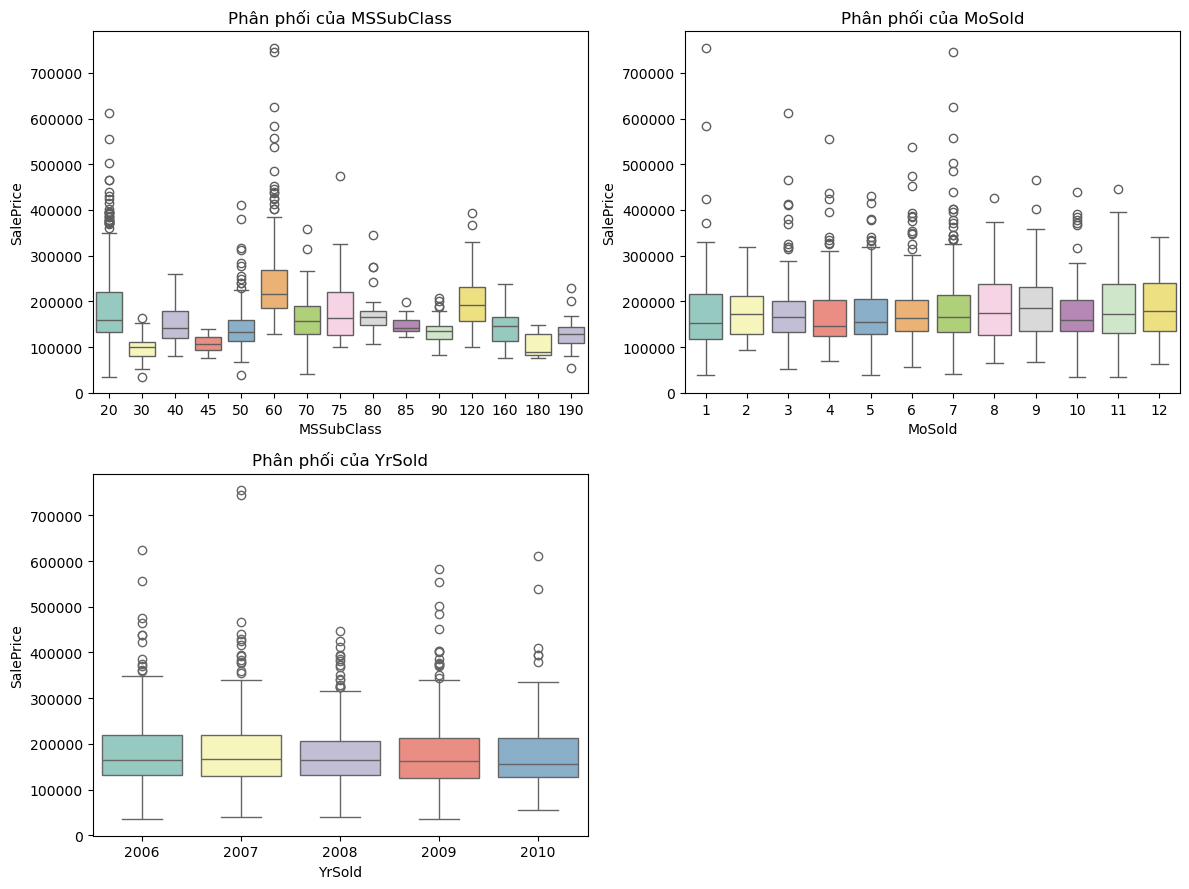

In [25]:
location_time_features = ['MSSubClass', 'MoSold', 'YrSold']

fig, axes = plt.subplots(2, 2, figsize=(12, 3 * 3))
axes = axes.flatten()

for i, col in enumerate(location_time_features):
    sns.boxplot(data=df, x=col, y='SalePrice', palette='Set3', ax=axes[i])
    axes[i].set_title(f'Phân phối của {col}', fontsize=12)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

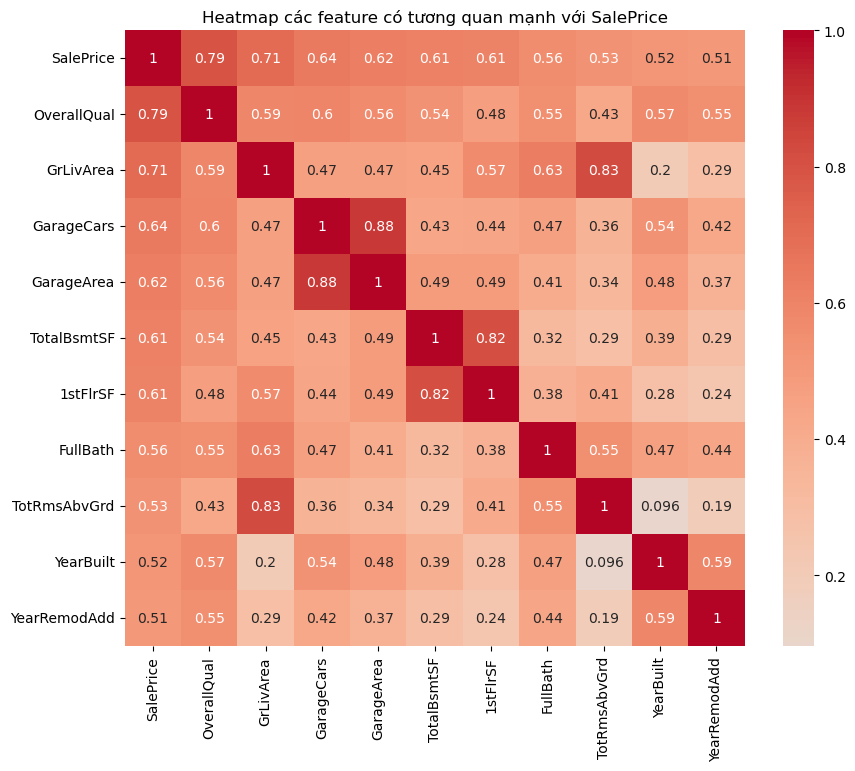

In [8]:
corr = df.corr(numeric_only=True)

corr_target = corr['SalePrice'].abs().sort_values(ascending=False)

high_corr_features = corr_target[corr_target > 0.5
                                 ].index

plt.figure(figsize=(10, 8))
sns.heatmap(df[high_corr_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Heatmap các feature có tương quan mạnh với SalePrice")
plt.show()

### Nhận xét:
* OverallQual tương quan cao nhất với SalePrice 0.79, cho thấy chất lượng luôn đi đôi với giá nhà
* GrLivArea tương quan cao với SalePrice 0.71, cho thấy căn nhà với diện tích càng lớn thì giá nhà càng cao
* GarageCars và GarageArea tương quan với SalePrice, cho thấy diện tích và sức chứa của Garage cũng là 1 yếu tố để dự đoán giá nhà
* TotalBsmtSF và 1stFrlSF tương quan với SalePrice, cho thấy diện tích nhà ở càng lớn thì giá nhà càng cao
* FullBath tương quan với SalePrice, cho thấy số nhà tắm cũng góp phần vào giá nhà
* TotRmsAbvGrd tương quan với Sale Price, cho thấy số căn phòng càng nhiều thì giá nhà càng cao
* YearBuild và YearRemodAdd tương quan với SalePrice, cho thấy các căn nhà càng mới thì giá càng cao



C:\Users\MSI VN\AppData\Local\Temp\ipykernel_3848\174993450.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='MSSubClass', y='SalePrice', palette='Set3')


<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

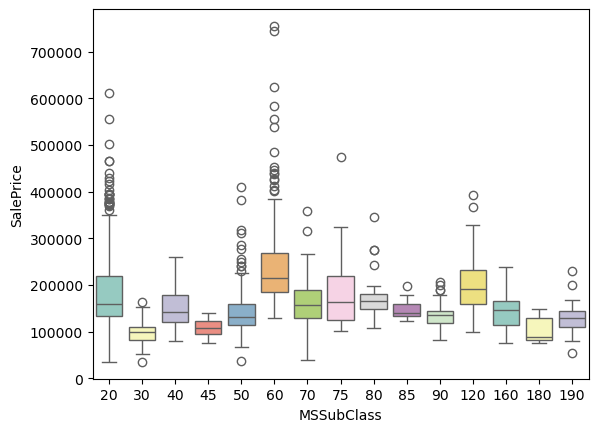

In [21]:
sns.boxplot(data=df, x='MSSubClass', y='SalePrice', palette='Set3')

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

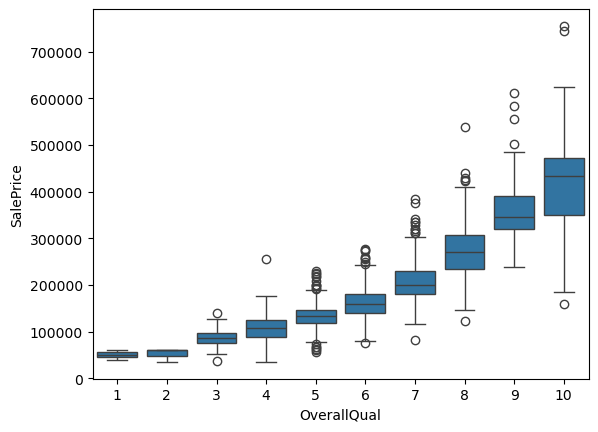

In [9]:
sns.boxplot(data=df, x='OverallQual', y='SalePrice')


### Nhận xét:
* Biểu đồ cho thấy **giá nhà tăng mạnh** theo **chất lượng tổng thể (OverallQual)** — từ dưới 100k (Qual 1–3) lên hơn 500k (Qual 9–10)
* Tuy nhiên xuất hiện **nhiều ngoại lệ giá cao bất thường** ở các mức Qual 5–8 (vượt quá 600k), cần **xử lý outliers** để tránh làm lệch kết quả dự đoán

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

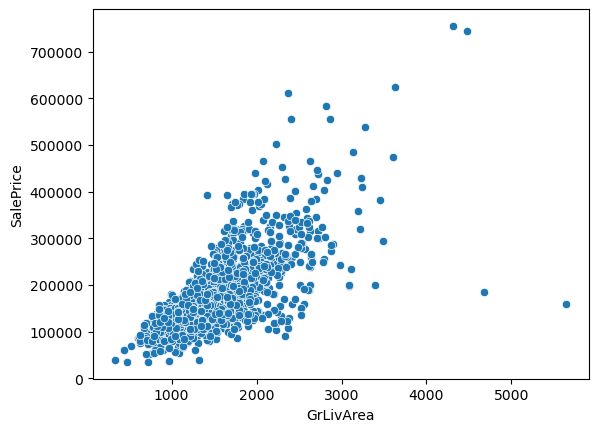

In [10]:
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')

### Nhận xét:
* Biểu đồ cho thấy các ngôi nhà có diện tích sàn lớn thì giá nhà sẽ cao hơn
* Tuy nhiên lại có 2 ngoại lệ dù có diện tích lớn nhất nhưng giá thành lại rất rẻ so với mặt bằng chung, cần xem xét xử lý để tránh ảnh hưởng đến kết quả dự đoán

## Nhận xét tổng thể và đề xuất phương pháp xử lý của nhóm Numeric Features:
* Đa số các feature đều có phân phối lệch phải, cần log transform để các model có thể dự đoán tốt hơn
* Các feature mạnh: 'OverallQual', 'GrlivArea',... cần được tập trung khai thác để dự đoán ra kết quả đúng nhất
* Có nhiều Outlier, cần có được xử lý để tránh ảnh hưởng đến kết quả


# Phân tích đặc trưng phân loại

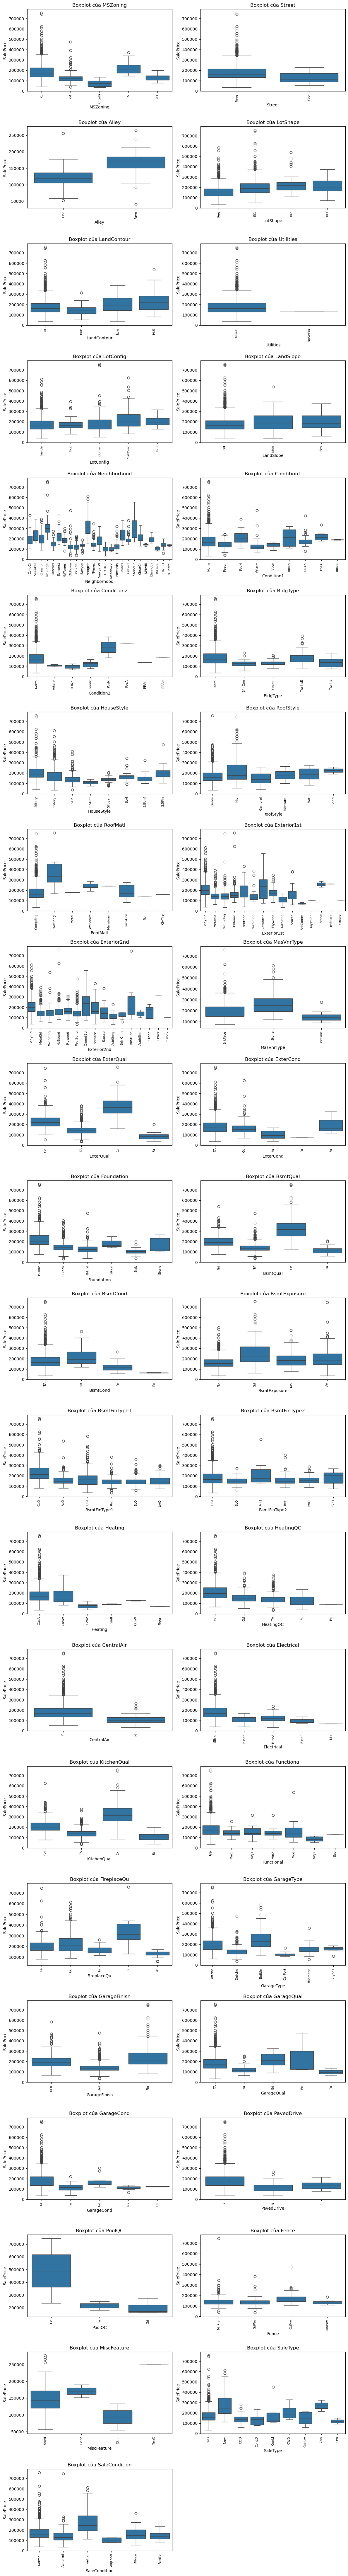

In [11]:
n_cols = 2
n_rows = int(np.ceil(len(cat_features)/ n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))

axes = axes.flatten() 

for i, col in enumerate(cat_features):
    sns.boxplot(df, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'Boxplot của {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90, labelsize=8)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Nhận xét:
* Biểu đồ cho thấy **khu dân cư (Neighborhood)** ảnh hưởng **mạnh nhất** đến giá nhà — NoRidge, NridgHt, StoneBr trung bình >400k, trong khi MeadowV, IDOTRR chỉ ~100k. Tuy nhiên có **nhiều ngoại lệ giá cực cao** (>700k) ở các khu trung bình như NAmes, cần **xử lý outliers** để tránh lệch mô hình

* Biểu đồ cho thấy **chất lượng bếp (KitchenQual = Ex)** có giá trung bình ~350k, cao gấp 3 lần mức Fa (~120k). Tuy nhiên có **ngoại lệ giá thấp** ở mức Ex (dưới 150k)

* Biểu đồ cho thấy **hầm chất lượng cao (BsmtQual = Ex)** đẩy giá lên ~400k, không hầm (NA) chỉ ~150k. Tuy nhiên có **ngoại lệ giá cao** ở nhóm không hầm (>500k)

* Biểu đồ cho thấy **nhà 1 gia đình (BldgType = 1Fam)** và **2 tầng (HouseStyle = 2Story)** có giá cao & ổn định hơn Twnhs, Duplex. Tuy nhiên có **ngoại lệ giá rẻ** ở 1Fam (<100k)

* Biểu đồ cho thấy **garage gắn liền (GarageType = BuiltIn)** + **3–4 xe (GarageCars)** có giá cao hơn hẳn so với garage rời hoặc không có. Tuy nhiên có **ngoại lệ giá cao** ở nhóm không garage (>400k), có thể do **nhà nhỏ nhưng vị trí VIP**

* Biểu đồ cho thấy **vật liệu ngoài cao cấp (Exterior1st = VinylSd, CemntBd)** giúp giá trung bình >250k, trong khi AsbShng, MetalSd chỉ ~150k. Tuy nhiên có **ngoại lệ giá cao** ở nhóm vật liệu kém (>500k)

* Biểu đồ cho thấy **điều hòa trung tâm (CentralAir = Y)** có giá trung bình cao hơn ~100k so với không có (N). Tuy nhiên có **ngoại lệ giá thấp** ở nhóm có điều hòa (<100k), cần **kiểm tra nhà cũ hoặc khu kém**

* Biểu đồ cho thấy **lò sưởi chất lượng cao (FireplaceQu = Ex)** đẩy giá lên ~350k, không có lò (NA) chỉ ~180k. Tuy nhiên có **ngoại lệ giá cao** ở nhóm không lò (>400k)

* Biểu đồ cho thấy **mái hiên (RoofStyle = Hip)** có giá trung bình cao hơn Gable ~50k–100k. Tuy nhiên có **ngoại lệ giá thấp** ở nhóm Hip (<150k)

* Biểu đồ cho thấy **đường trải nhựa (PavedDrive = Y)** có giá cao hơn đường đất (N) khoảng 80k–100k. Tuy nhiên có **ngoại lệ giá cao** ở nhóm đường đất (>400k), có thể do **khu cao cấp nông thôn**

* Biểu đồ cho thấy **hồ bơi chất lượng cao (PoolQC = Ex)** có giá rất cao (~600k+), nhưng **rất ít dữ liệu**. Tuy nhiên **nhiều ngoại lệ giá cao** ở nhóm không hồ bơi, → **hồ bơi không phải yếu tố chính**

* Biểu đồ cho thấy **hàng rào tốt (Fence = GdPrv)** có giá nhỉnh hơn không rào (NA), nhưng **không đáng kể**. Tuy nhiên có **ngoại lệ giá cao** ở nhóm không rào (>500k), → **hàng rào ít ảnh hưởng**, có thể **không dùng trong mô hình**

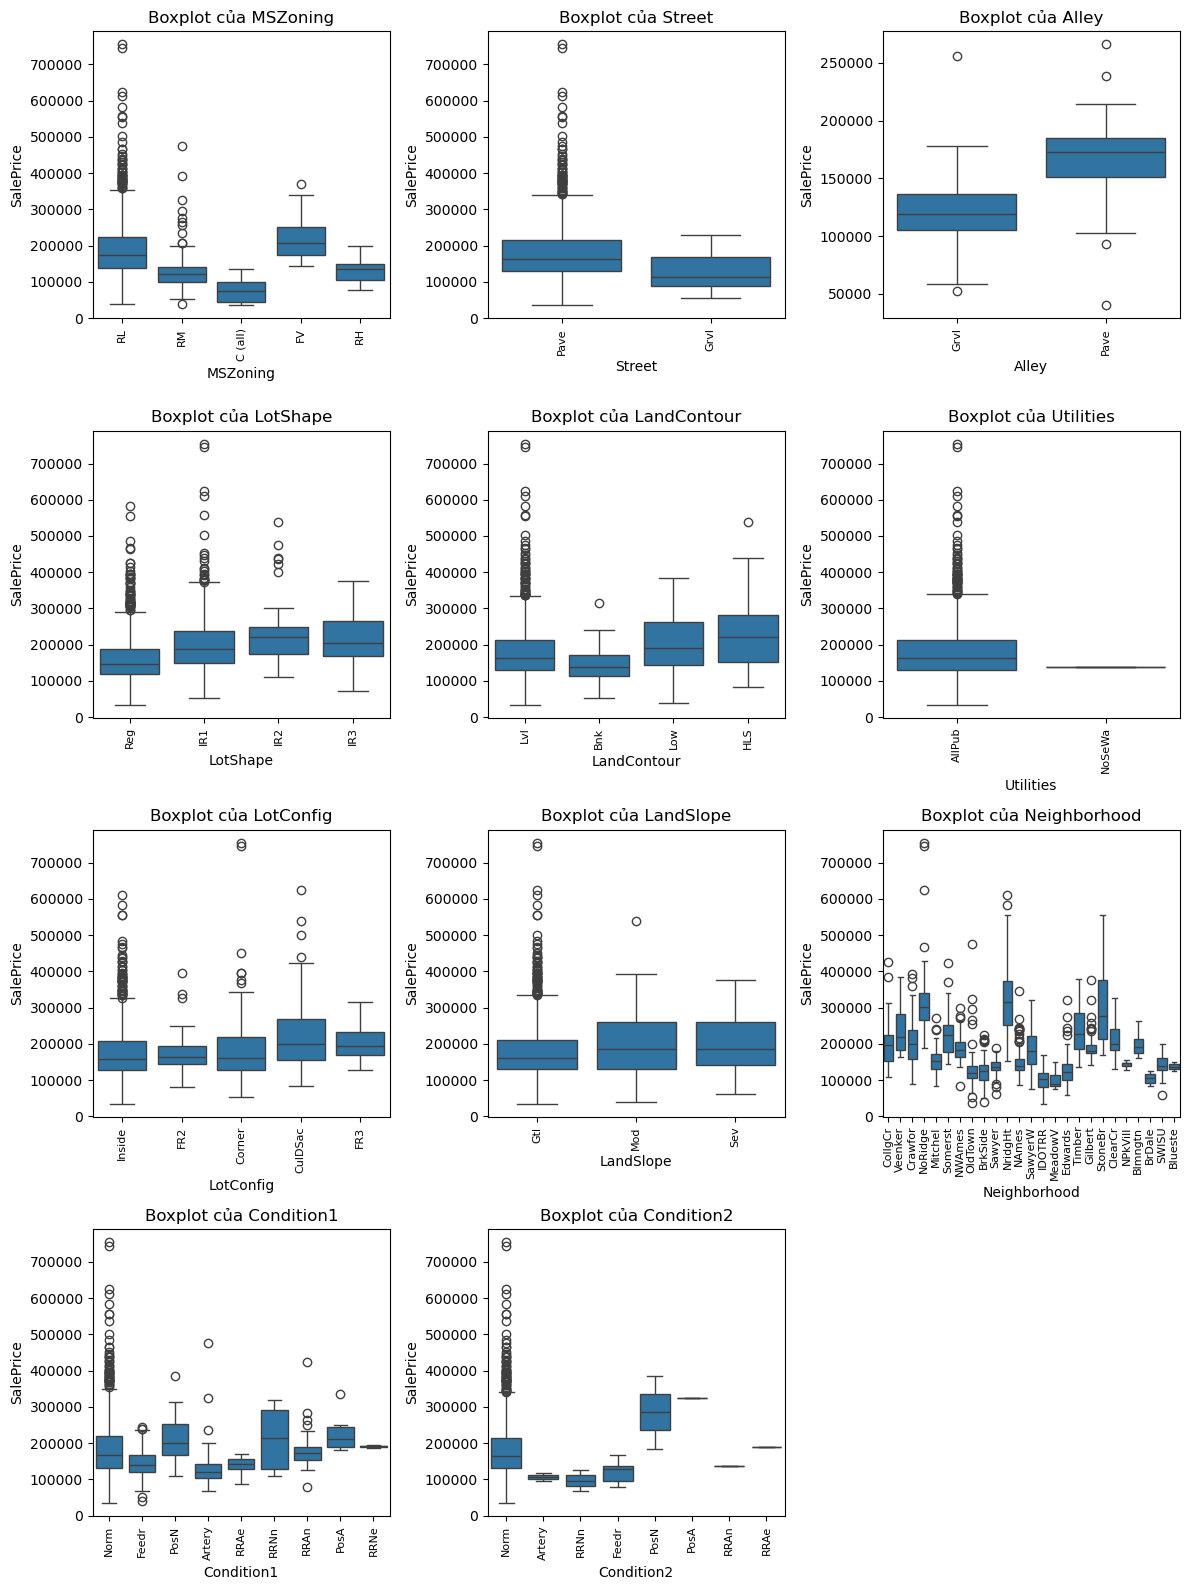

In [5]:
lot_feature = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2']

fig, axes = plt.subplots(4, 3, figsize=(12,4 * 4))

axes = axes.flatten() 

for i, col in enumerate(lot_feature):
    sns.boxplot(df, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'Boxplot của {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90, labelsize=8)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

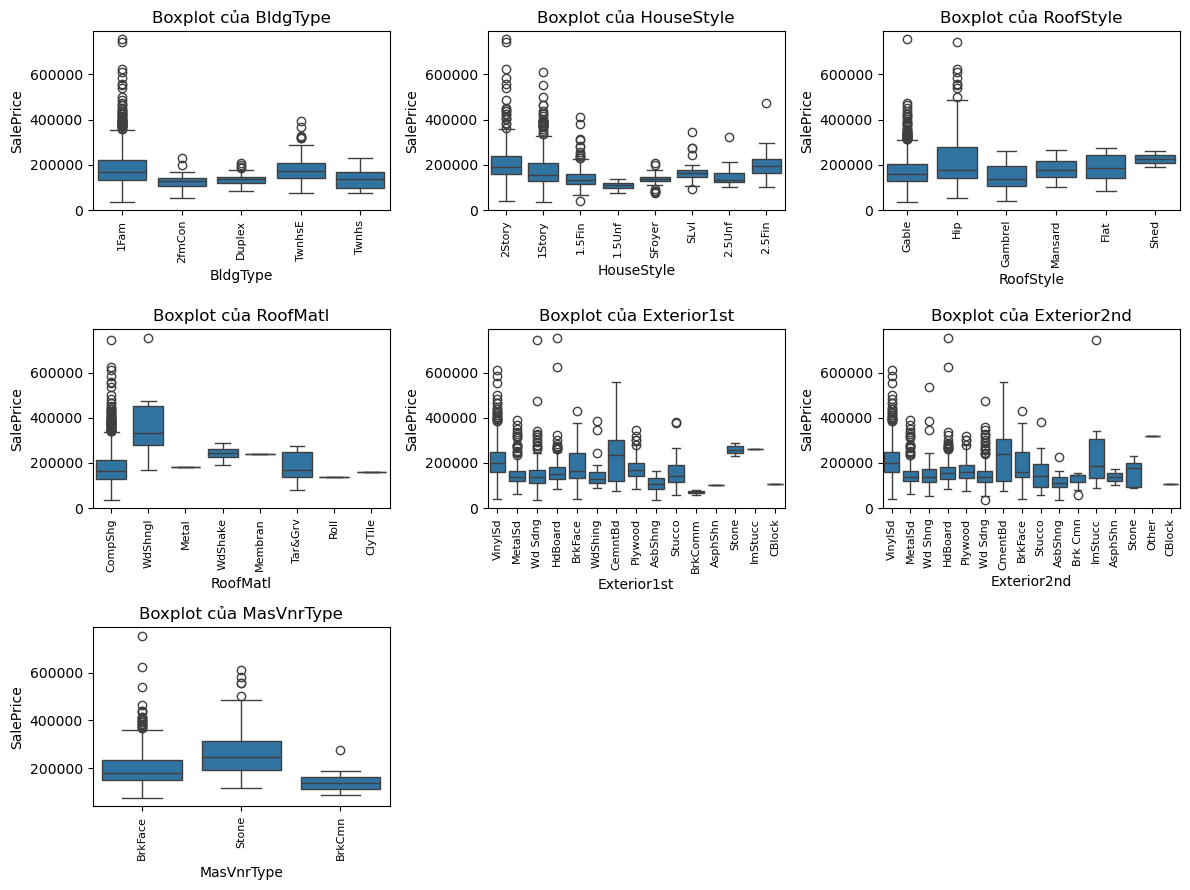

In [6]:
buliding_feature = ['BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType']

fig, axes = plt.subplots(3, 3, figsize=(12,3 * 3))
axes = axes.flatten()

for i, col in enumerate(buliding_feature):
    sns.boxplot(df, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'Boxplot của {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90, labelsize=8)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

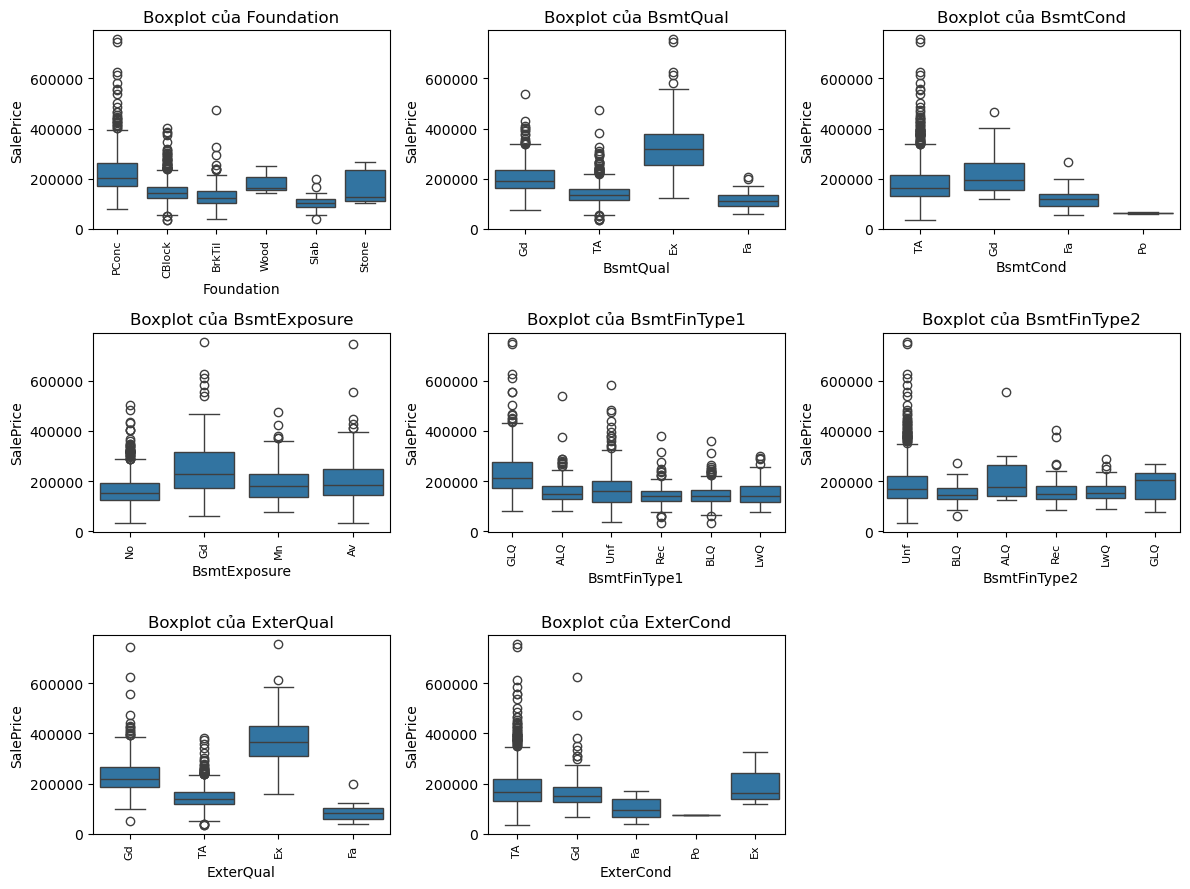

In [7]:
found_feature = ['Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'ExterQual', 'ExterCond']

fig, axes = plt.subplots(3, 3, figsize=(12,3 * 3))
axes = axes.flatten()
for i, col in enumerate(found_feature):
    sns.boxplot(df, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'Boxplot của {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90, labelsize=8)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

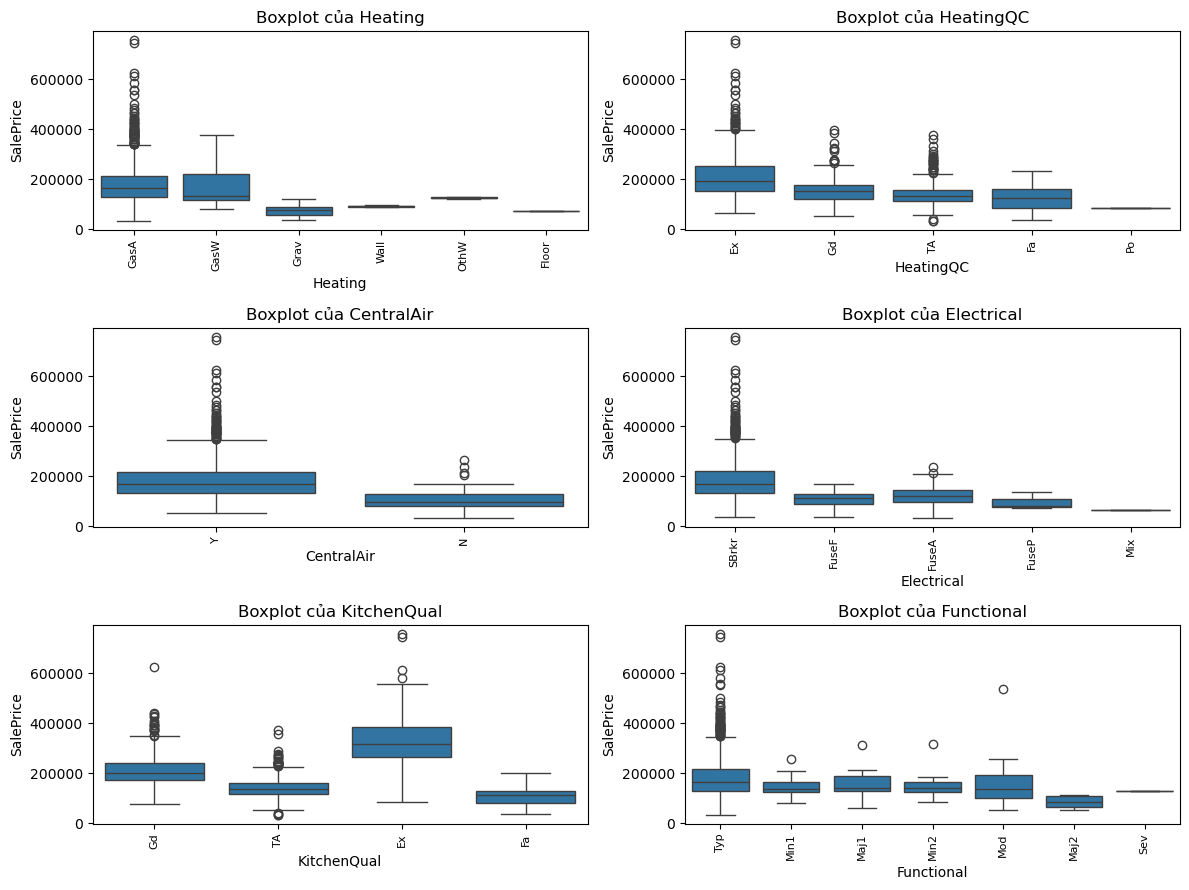

In [9]:
system_feature = ['Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional']

fig, axes = plt.subplots(3, 2, figsize=(12,3 * 3))
axes = axes.flatten()
for i, col in enumerate(system_feature):
    sns.boxplot(df, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'Boxplot của {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90, labelsize=8)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

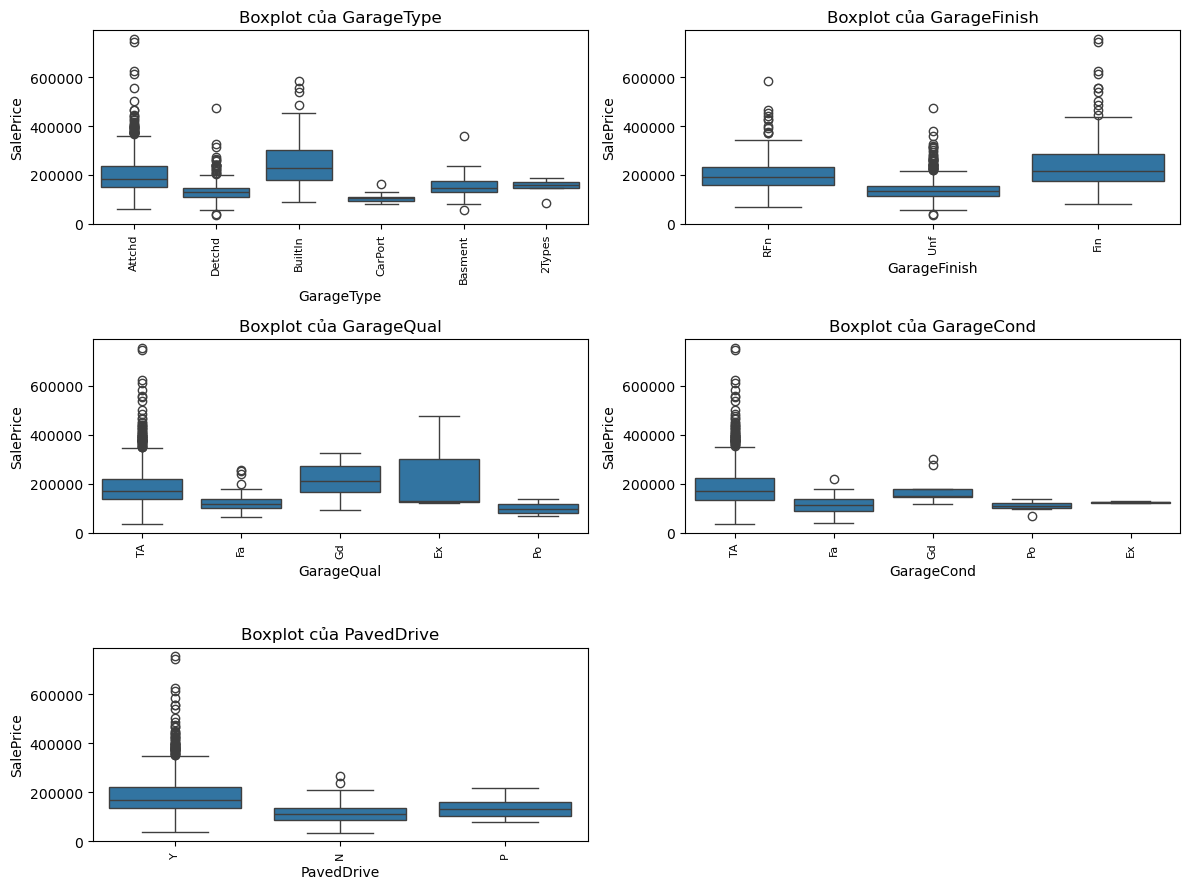

In [10]:
garage_feature = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']

fig, axes = plt.subplots(3, 2, figsize=(12,3 * 3))
axes = axes.flatten()

for i, col in enumerate(garage_feature):

    sns.boxplot(df, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'Boxplot của {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90, labelsize=8)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])    
plt.tight_layout()
plt.show()

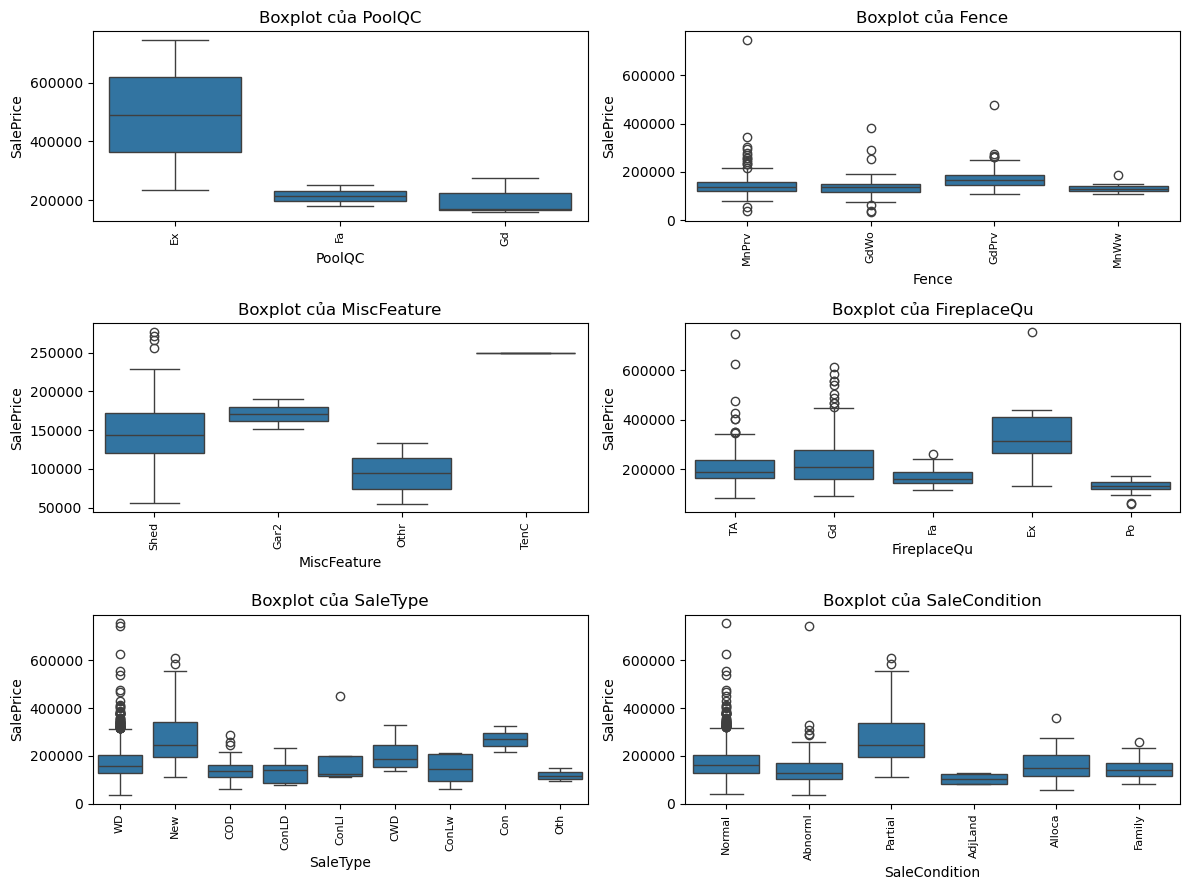

In [11]:
ss_feature = ['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'SaleType', 'SaleCondition']

fig, axes = plt.subplots(3, 2, figsize=(12,3 * 3))
axes = axes.flatten()   
for i, col in enumerate(ss_feature):
    sns.boxplot(df, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'Boxplot của {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90, labelsize=8)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])    
plt.tight_layout()
plt.show()

## Nhận xét tổng thể và đề xuất phương pháp xử lý categorical feature
* Sau khi phân tích ta chọn được ra các feature mạnh để có thể đi dự đoán như: Neighborhood, KitchenQual, GarageType,...
* Nên đem các feature categorical đi encode để model có thể dự đoán